# **Proyecto 4 - Clustering**
*Estudiantes:*
* Dayana Valentina Gonzalez Vargas
* Juan Manuel Ramirez Osuna

### **Librerias**

In [59]:
# Librerias
import pandas as pd
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

### **Cargar el conjunto de datos** 

In [2]:
# Cargar datos y eliminar los nulos.
dataset = pd.read_csv('CrimenCambridge.csv').dropna()
dataset.head()

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA"
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA"
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg..."
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA"
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA"


In [3]:
# Vizualización del nombre de las columnas
dataset.columns

Index(['File Number', 'Date of Report', 'Crime Date Time', 'Crime',
       'Reporting Area', 'Neighborhood', 'Location'],
      dtype='object')

### **Eliminación de variebles**
Para el trabajo de clustering a realizar tomaremos unicamente las variables *Crime*, *Reporting Area* y *Neighborhood*. Las otras variables las eliminaremos.

In [4]:
# Eliminar columnas
dataset = dataset.drop(columns=['File Number','Date of Report', 'Crime Date Time','Location'])
dataset.head()

,Crime,Reporting Area,Neighborhood
0,Simple Assault,504.0,Cambridgeport
1,Simple Assault,610.0,Mid-Cambridge
2,Aggravated Assault,708.0,Riverside
3,Simple Assault,105.0,East Cambridge
4,Disorderly,708.0,Riverside


Contares cuando hay de cada una de los datos de variables categoricas.

In [5]:
dataset['Crime'].value_counts()

Larceny from MV           4826
Hit and Run               4652
Domestic Dispute          3899
Mal. Dest. Property       3666
Simple Assault            3292
Larceny from Building     2856
Shoplifting               2788
Larceny of Bicycle        2744
Housebreak                2668
Forgery                   2579
Warrant Arrest            2572
Larceny from Person       2274
Larceny from Residence    1739
Aggravated Assault        1726
Threats                   1633
Auto Theft                1101
Missing Person             949
Flim Flam                  936
Harassment                 812
Street Robbery             759
Drugs                      673
Admin Error                659
Accident                   626
Commercial Break           584
Phone Calls                450
OUI                        387
Suspicious Package         381
Violation of R.O.          377
Trespassing                359
Disorderly                 306
Larceny (Misc)             268
Taxi Violation             259
Larceny 

In [6]:
dataset['Neighborhood'].value_counts()

Cambridgeport       7825
East Cambridge      7683
Area 4              6016
North Cambridge     5596
West Cambridge      5541
Mid-Cambridge       5474
Riverside           5249
Inman/Harrington    4190
Peabody             3511
Agassiz             1512
Highlands           1203
MIT                 1092
Strawberry Hill     1037
Name: Neighborhood, dtype: int64

Convertimos las variables categorícas en dummies, eliminando primero la columna.

In [7]:
# Pasar a dummies
dataset = pd.get_dummies(dataset, drop_first = True)
dataset.head()

,Reporting Area,Crime_Admin Error,Crime_Aggravated Assault,Crime_Annoying & Accosting,Crime_Arson,Crime_Auto Theft,Crime_Commercial Break,Crime_Commercial Robbery,Crime_Counterfeiting,Crime_Disorderly,...,Neighborhood_East Cambridge,Neighborhood_Highlands,Neighborhood_Inman/Harrington,Neighborhood_MIT,Neighborhood_Mid-Cambridge,Neighborhood_North Cambridge,Neighborhood_Peabody,Neighborhood_Riverside,Neighborhood_Strawberry Hill,Neighborhood_West Cambridge
0,504.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,610.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,708.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,105.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,708.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


Notemos que nuestro conjunto de datos aumento en cantidad de variables, al pasar las variables anteriores a dummies por lo que tomaremos muestras aleactorias de 5000 registros.

In [8]:
New_dataset = dataset.sample(5000)
New_dataset.head(10)

,Reporting Area,Crime_Admin Error,Crime_Aggravated Assault,Crime_Annoying & Accosting,Crime_Arson,Crime_Auto Theft,Crime_Commercial Break,Crime_Commercial Robbery,Crime_Counterfeiting,Crime_Disorderly,...,Neighborhood_East Cambridge,Neighborhood_Highlands,Neighborhood_Inman/Harrington,Neighborhood_MIT,Neighborhood_Mid-Cambridge,Neighborhood_North Cambridge,Neighborhood_Peabody,Neighborhood_Riverside,Neighborhood_Strawberry Hill,Neighborhood_West Cambridge
3185,506.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36689,102.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
54174,411.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26307,501.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17545,503.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55324,904.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22986,604.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
47511,107.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8464,708.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32138,102.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
# Vizualizar nombre de las columnas
New_dataset.columns

Index(['Reporting Area', 'Crime_Admin Error', 'Crime_Aggravated Assault',
       'Crime_Annoying & Accosting', 'Crime_Arson', 'Crime_Auto Theft',
       'Crime_Commercial Break', 'Crime_Commercial Robbery',
       'Crime_Counterfeiting', 'Crime_Disorderly', 'Crime_Domestic Dispute',
       'Crime_Drinking in Public', 'Crime_Drugs', 'Crime_Embezzlement',
       'Crime_Extortion/Blackmail', 'Crime_Flim Flam', 'Crime_Forgery',
       'Crime_Gambling', 'Crime_Harassment', 'Crime_Hit and Run',
       'Crime_Homicide', 'Crime_Housebreak', 'Crime_Indecent Exposure',
       'Crime_Kidnapping', 'Crime_Larceny (Misc)',
       'Crime_Larceny from Building', 'Crime_Larceny from MV',
       'Crime_Larceny from Person', 'Crime_Larceny from Residence',
       'Crime_Larceny of Bicycle', 'Crime_Larceny of Plate',
       'Crime_Larceny of Services', 'Crime_Liquor Possession/Sale',
       'Crime_Mal. Dest. Property', 'Crime_Missing Person',
       'Crime_Noise Complaint', 'Crime_OUI', 'Crime_Peeping & S

### **Analisís de componentes principales(PCA)**
Realizaremos Analisis de componentes principales para reduccir la dimension de nuestra base de datos ya que ahora tenemos unas 66 variables. Para reducir a dos dimensiones.

In [68]:
#Realizamos PCA
pca = PCA(n_components=2)
Principalcomponents = pca.fit_transform(New_dataset)
principalDf = pd.DataFrame(data = Principalcomponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head()


,principal component 1,principal component 2
0,-107.835854,0.877814
1,-511.836153,-0.432915
2,-202.835868,-0.071879
3,-112.835855,0.886399
4,-110.835843,0.864737
...,...,...
4995,-107.835836,0.853210
4996,-108.835853,0.866895
4997,-311.835828,-0.024349
4998,-511.836166,-0.443468


### Vizualización Componentes principales

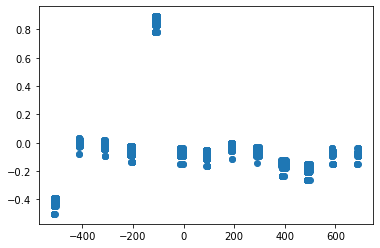

In [11]:
# Grafica de las dos componentes principales
plt.scatter(Principalcomponents[:, 0], Principalcomponents[:,1])
plt.show()

A partir de la vizualización anterior podemos ver que los componentes principales se agrupan en una cantidad de 13 grupos.

### **DBSCAN**
Probaremos inicialmente con el parametro de $\epsilon$ menor que uno con un $\epsilon = 0.5$ para observar como cambia el modelo y tomaremos un minimo de muestras de 4, debido a que son 2 * la dimensión. 

In [34]:
clustering = DBSCAN(eps=0.5, min_samples=4).fit(principalDf)
set(clustering.labels_)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111}

Notemos que este metodo nos divide en 112 clusters, el cluster con label -1 nos ayuda a ver los valores atipicos que se pueden generar el la partición en clusters. 

### **Vizualización de cluesters**

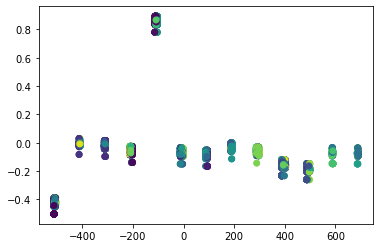

In [32]:
plt.scatter(Principalcomponents[:, 0], Principalcomponents[:,1], c=clustering.labels_)
plt.show()

Ahora, tomaremos $\epsilon = 1$ para en cuentos clusters nos divide nuestro conjunto de datos.

In [29]:
clustering = DBSCAN(eps=1, min_samples=4).fit(principalDf)
set(clustering.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

Notemos que ahora nos dividio en 13 clusters como inicialmente lo supusimos a ojo.

### **Vizualización de clusters**

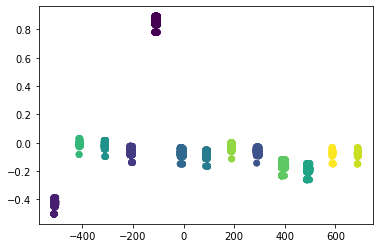

In [30]:
plt.scatter(Principalcomponents[:, 0], Principalcomponents[:,1], c=clustering.labels_)
plt.show()

*Nota:* En el caso que se tomo un $\epsilon$ menor a 1 nos dimos cuenta que no realizaba muy bien las agrupaciones debido a que la distancia es tan pequeña que incluso datos que son visualmente cercanos no llegan a formar un grupo por el metodo. En cambio usando un número mayor o igual a 1 realiza una agrupación mas semejante a los grupos visualmente diferenciables.


### **K-Means**
Para k-means tomaremos como número de clusters 13.


In [62]:
kmeans = KMeans(n_clusters=13, random_state=0).fit(principalDf)
set(kmeans.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

### **Vizualización clusters**

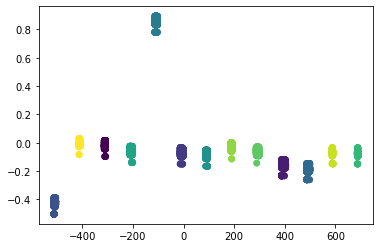

In [63]:
plt.scatter(Principalcomponents[:, 0], Principalcomponents[:,1], c=kmeans.labels_)
plt.show()

### **Spectral Clustering**
Para el clustering espectral tomaremos como número de clusters 13.

In [56]:
spectral = SpectralClustering(n_clusters=13, random_state=0).fit(principalDf)
set(spectral.labels_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

### **Vizualización Clusters**

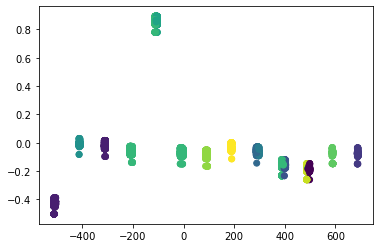

In [57]:
plt.scatter(Principalcomponents[:, 0], Principalcomponents[:,1], c=spectral.labels_)
plt.show()

### **Algoritmos Aglomerativos**
Para este algoritmo tomares como número de clusters 13.

In [65]:
aglomerativo = AgglomerativeClustering(n_clusters = 13).fit(principalDf)
set(aglomerativo.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

### **Vizualización de clusters**

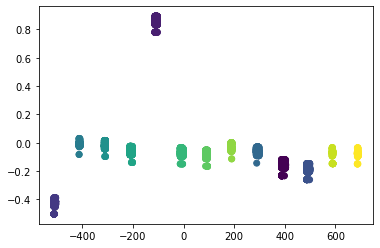

In [66]:
plt.scatter(Principalcomponents[:, 0], Principalcomponents[:,1], c=aglomerativo.labels_)
plt.show()

### **Toma de Indices**
Ahora, tomaremos uno de los algoritmos anteriores en nuestro caso *DBSCAN* con $\epsilon = 1$ y tomaremos los indices del cluster 5 y veremos en el dataset de 5000 registros que tienen en comun estas variables.

In [67]:
# Revisamos el número de clusters 
clustering.labels_

array([ 0,  5, 10, ..., 12,  5, 12], dtype=int64)

Agregamos una nueva columna en el dataset de los 5000 registros que sea igual a las etiquetas dadas por el algoritmo *DBSCAN*. Además realizaremos un filtro que tome los valores del dataset que fueron etiquetados dentr del cluster 5.

In [92]:
#Agregar nueva columna
New_dataset["labels"] = clustering.labels_
# tomamos los valores que tengan la etiqueta igual a el cluster 5.
pruebita = New_dataset[New_dataset["labels"] == 5]
pruebita.head()

,Reporting Area,Crime_Admin Error,Crime_Aggravated Assault,Crime_Annoying & Accosting,Crime_Arson,Crime_Auto Theft,Crime_Commercial Break,Crime_Commercial Robbery,Crime_Counterfeiting,Crime_Disorderly,...,Neighborhood_Highlands,Neighborhood_Inman/Harrington,Neighborhood_MIT,Neighborhood_Mid-Cambridge,Neighborhood_North Cambridge,Neighborhood_Peabody,Neighborhood_Riverside,Neighborhood_Strawberry Hill,Neighborhood_West Cambridge,labels
36689,102.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
47511,107.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
32138,102.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
41250,101.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
31038,105.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10109,103.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
10562,105.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
15068,102.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
49151,106.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


Realizaremos la suma de cada una de las columnas, y ver en cual columna se encuentra la cantidad de filas de los resultados filtrados y así ver que tienen en comun estos indices que se agruparon en in mismo cluster.

In [93]:
# suma de columnas
agregados = pruebita.sum() 
agregados[agregados > 500]

Reporting Area                 72275.0
Neighborhood_East Cambridge      694.0
labels                          3470.0
dtype: float64

**Nota:** Se realizan sumas de las columnas de los datos agrupados sobre el label 5 aprovechando los valores resultantes de one hot encoding para contar la cantidad de filas que cumplen cada uno de las caracteristicas consideradas. Se realiza un filtro para poder identificar las caracteristicas que se comparten en todos o la mayoria de los datos.

### **Conclusiones**
De este proyecto pudimos concluir que:
* Los datos reportados se dividen de manera eficiente en 13 grupos
* Todos los metodos propuestos en el enunciado realizan una agrupacion eficiente de los datos al ser coherente con la agrupacion visualmente identificada
* A pesar de que el cluster mostrado tiene una totalidad de los datos cumpliendo una misma caracteristica, se encontro que al menos en el metodo de DBSCAN hay clusters donde la caracteristica mas compartida lo es por menos de la mitad de los datos en el cluster
* Notese que el metodo de DBSCAN es eficiente al no requerir el numero de grupos definido para el funcionamiento del algoritmo. Sin embargo este metodo fue ineficiente cuando se asignaba un $\epsilon$ menos a 1 
* Se probo el metodo espectral como un metodo adicional y se encontro que tiene una peor clasificacion en este caso que los demas metodos, esto puede ser por un problema en el manejo de los parametros